# 資料參考自: https://ithelp.ithome.com.tw/articles/10192043
# 根據參考資料的 key words 去找到 程式: https://github.com/GoatWang/ithome_ironman/blob/master/day16_NLP_Chinese/NLP_Chinese.ipynb
# 該程式網頁沒有其他用到的資源 dict.txt.big 等，所以是從 internet 去找
# 字型也被我改掉
# 其他結巴練功  https://tw.saowen.com/a/61cc8cbb31fec4a118452db19908a19e86d1fef108994ea22f80498ae1fe0841


In [1]:
import jieba
jieba.set_dictionary('dict.txt.big')
with open('stops.txt', 'r', encoding='utf8') as f:
    stops = f.read().split('\n') 
import numpy as np

In [2]:
print([t for t in jieba.cut('下雨天留客天留我不留')])
print([t for t in jieba.cut('下雨天留客天留我不留', cut_all=True)])

Building prefix dict from D:\MyPython\practice\wordcloud\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u164e0b3f1260b296c515087394102144.cache
Loading model cost 1.333 seconds.
Prefix dict has been built succesfully.


['下雨天', '留客', '天留', '我', '不留']
['下雨', '下雨天', '雨天', '留客', '天', '留', '我', '不留']


In [3]:
count = 15
num = len(stops)//count
#for i in range(num):
#    print(", ".join(stops[i*num : (i+1)*num]))

In [4]:
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt

testStr = """
前言
中文自然語言處理，與英文最大的差別就在斷詞，但是說實話，這個部分至今仍然沒有一個套件可以做好很好。目前而言，繁體中文有兩個套件可以使用，一個是中研院開發的斷詞系統，但是經過多方打聽，使用上並不是特別方便。因此我個人打選擇使用第二套系統jieba，中文叫做結巴，很幸運地這個套件有python的介面，使用上非常容易，只是這是大陸人開發的系統，必須自行輸入繁體字典，這篇文章的繁體字典出處在這邊。順帶一提，這篇文章寫得很好，對於jieba如果有想要有更深的認識，可以好好拜讀。
另外，由於這篇文章有使用到許多外部資源，所以若有需要巡長文章中出現的其他檔案，請參考這個repo

斷詞
結巴的斷詞分成兩個模式，精準模式只找到系統演算出最精準的斷詞可能，全斷詞模式則是把所有可能的斷詞模式列出來，如果你想要用來做文本分析，句子又沒有很長的的時候，建議你可以使用全斷詞模式，可以增加文跟文章之間的可比性，我曾經因為把斷詞模式改掉，在預測準確率上面就從96%變成99%，大家可以參考一下。

去除停用字
這個部分跟英文沒什麼差別啦，只是中文的停用字並沒有被內建在nltk當中，要自己找檔案，上面Import是我找到的檔案，大家覺得不夠好也可以自己再去找。不過因為實在太長的，我就不全部列出來了。

詞性標注
雖然jieba也有提供詞性標注功能，不過實在做得還不到能用的程度，實務上我也沒什麼在用，所以大家就先略過這個部分吧。

其他
由於這邊文章實在太短了，又有很大部分與昨天的文章重複，所以我們就拿上面我已經打好的文字來做分析吧。
"""

In [5]:
stops.append('\n')
stops.append('\n\n')
terms = [t for t in jieba.cut(testStr, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('斷', 9),
 ('文章', 7),
 ('使用', 6),
 ('模式', 6),
 ('詞', 5),
 ('中文', 4),
 ('部分', 4),
 ('系統', 4),
 ('詞模式', 4),
 ('套件', 3),
 ('好', 3),
 ('繁體', 3),
 ('jieba', 3),
 ('篇文章', 3),
 ('檔案', 3),
 ('做', 3),
 ('上面', 3),
 ('實在', 3),
 ('英文', 2),
 ('差別', 2),
 ('一個', 2),
 ('兩個', 2),
 ('以使', 2),
 ('開發', 2),
 ('結巴', 2),
 ('繁體字', 2),
 ('字典', 2),
 ('想要', 2),
 ('參考', 2),
 ('精準', 2),
 ('找到', 2),
 ('全', 2),
 ('列出', 2),
 ('列出來', 2),
 ('分析', 2),
 ('停用', 2),
 ('用字', 2),
 ('沒什麼', 2),
 ('找', 2),
 ('實在太', 2),
 ('詞性', 2),
 ('標', 2),
 ('注', 2),
 ('前言', 1),
 ('自然', 1),
 ('自然語言', 1),
 ('語言', 1),
 ('處理', 1),
 ('最大', 1),
 ('說實話', 1),
 ('實話', 1),
 ('分至', 1),
 ('至今', 1),
 ('一個套', 1),
 ('做好', 1),
 ('目前', 1),
 ('繁體中文', 1),
 ('中研', 1),
 ('中研院', 1),
 ('多方', 1),
 ('打聽', 1),
 ('特別', 1),
 ('方便', 1),
 ('選擇', 1),
 ('第二', 1),
 ('第二套', 1),
 ('二套', 1),
 ('叫做', 1),
 ('幸運', 1),
 ('幸運地', 1),
 ('python', 1),
 ('介面', 1),
 ('非常容易', 1),
 ('常容', 1),
 ('容易', 1),
 ('大陸', 1),
 ('人', 1),
 ('自行', 1),
 ('輸入', 1),
 ('出處', 1),
 ('處在', 1),
 ('順帶', 1),
 

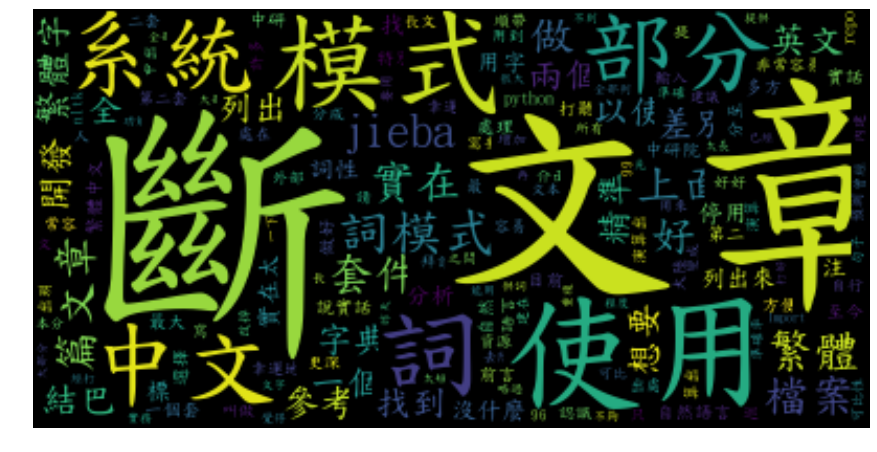

In [6]:

font_path = "/fonts/kaiu.ttf"
wordcloud = WordCloud(font_path=font_path)

wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

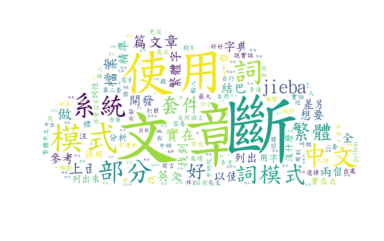

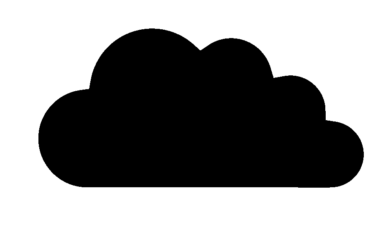

In [7]:

from PIL import Image

alice_mask = np.array(Image.open("cloud_mask7.png"))
wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask, font_path=font_path)
wc.generate_from_frequencies(Counter(terms))

# store to file
# wc.to_file(path.join(d, "cloud.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()